Alternatively, you can use the code below to create an upload button directly in the notebook:

In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving ecommerce_returns_dataset.csv to ecommerce_returns_dataset (1).csv


In [8]:
df = pd.read_csv('ecommerce_returns_dataset.csv')

In [11]:
df.shape

(2000, 19)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                2000 non-null   object 
 1   customer_id             2000 non-null   object 
 2   product_id              2000 non-null   object 
 3   category                2000 non-null   object 
 4   price                   2000 non-null   float64
 5   cost                    2000 non-null   float64
 6   quantity                2000 non-null   int64  
 7   discount                2000 non-null   float64
 8   delivery_days           2000 non-null   int64  
 9   order_date              2000 non-null   object 
 10  return_date             354 non-null    object 
 11  is_returned             2000 non-null   int64  
 12  return_reason           354 non-null    object 
 13  revenue                 2000 non-null   float64
 14  nominal_profit          2000 non-null   

In [9]:
df.head(5)

,order_id,customer_id,product_id,category,price,cost,quantity,discount,delivery_days,order_date,return_date,is_returned,return_reason,revenue,nominal_profit,profit_after_return,location,customer_age,customer_tenure_months
0,O1,C198,P40,Beauty,37.89,28.88,3,0.20,7,2023-01-08,NaN,0,NaN,90.94,4.30,4.30,North,64,7
1,O2,C253,P133,Toys,215.58,153.35,1,0.22,2,2023-08-31,NaN,0,NaN,168.15,14.80,14.80,South,53,1
2,O3,C397,P172,Beauty,217.23,115.24,2,0.30,9,2023-08-27,NaN,0,NaN,304.12,73.64,73.64,South,52,59
3,O4,C473,P8,Home,216.56,148.53,1,0.06,9,2024-03-05,NaN,0,NaN,203.57,55.04,55.04,North,26,41
4,O5,C406,P108,Home,266.21,225.02,2,0.25,7,2023-07-19,NaN,0,NaN,399.31,-50.73,-50.73,East,61,26


In [15]:
df.tail(5)

,order_id,customer_id,product_id,category,price,cost,quantity,discount,delivery_days,order_date,return_date,is_returned,return_reason,revenue,nominal_profit,profit_after_return,location,customer_age,customer_tenure_months
1995,O1996,C143,P86,Beauty,99.34,80.72,1,0.25,1,2024-02-02,NaN,0,NaN,74.50,-6.22,-6.22,South,36,46
1996,O1997,C116,P137,Electronics,84.30,60.90,1,0.21,8,2024-04-14,NaN,0,NaN,66.60,5.70,5.70,West,46,5
1997,O1998,C53,P98,Sports,203.99,172.73,1,0.13,9,2023-07-28,NaN,0,NaN,177.47,4.74,4.74,East,38,42
1998,O1999,C187,P7,Home,211.93,135.32,1,0.27,4,2024-02-04,NaN,0,NaN,154.71,19.39,19.39,East,50,18
1999,O2000,C425,P80,Electronics,15.24,8.13,1,0.09,3,2023-10-21,NaN,0,NaN,13.87,5.74,5.74,North,50,36


Removing not required Columns.

In [16]:
columns_to_drop = ['return_date', 'customer_age', 'customer_tenure_months', 'order_date']
df = df.drop(columns=columns_to_drop)
display(df.head())

,order_id,customer_id,product_id,category,price,cost,quantity,discount,delivery_days,is_returned,return_reason,revenue,nominal_profit,profit_after_return,location
0,O1,C198,P40,Beauty,37.89,28.88,3,0.20,7,0,NaN,90.94,4.30,4.30,North
1,O2,C253,P133,Toys,215.58,153.35,1,0.22,2,0,NaN,168.15,14.80,14.80,South
2,O3,C397,P172,Beauty,217.23,115.24,2,0.30,9,0,NaN,304.12,73.64,73.64,South
3,O4,C473,P8,Home,216.56,148.53,1,0.06,9,0,NaN,203.57,55.04,55.04,North
4,O5,C406,P108,Home,266.21,225.02,2,0.25,7,0,NaN,399.31,-50.73,-50.73,East


Check missing values

In [17]:
df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
category,0
price,0
cost,0
quantity,0
discount,0
delivery_days,0
is_returned,0


return reason contain missing values so I need to Fill this with "No Return"

In [18]:
df['return_reason'] = df['return_reason'].fillna('No Return')


In [20]:
df['return_reason'].value_counts()


,count
return_reason,
No Return,1646
Size Issue,111
Damaged,104
Changed Mind,72
Not as described,67


Verify that the missing values are Filled properly?

In [21]:
df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
category,0
price,0
cost,0
quantity,0
discount,0
delivery_days,0
is_returned,0


1. Checking the % of Orders which are missing

In [22]:
return_rate = df['is_returned'].mean() * 100
print(f"Overall Return Rate: {return_rate:.2f}%")


Overall Return Rate: 17.70%


#Overall Return Rate: 17.70%

2. Which return reasons are most common?

In [23]:
df['return_reason'].value_counts()


,count
return_reason,
No Return,1646
Size Issue,111
Damaged,104
Changed Mind,72
Not as described,67


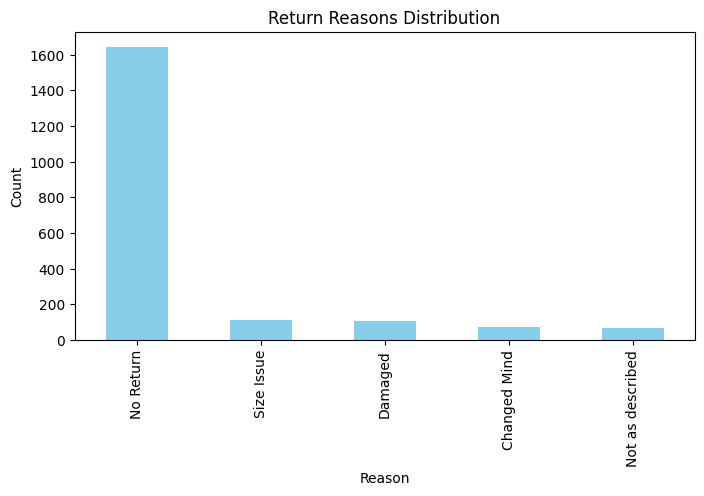

In [25]:
import matplotlib.pyplot as plt

df['return_reason'].value_counts().plot(kind='bar', color='skyblue', figsize=(8,4))
plt.title('Return Reasons Distribution')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()


# Most Common Reason is Size Issue



3. Compare Profit Before vs After Returns

In [26]:
df[['nominal_profit', 'profit_after_return']].describe()


,nominal_profit,profit_after_return
count,2000.00000,2000.00000
mean,29.27466,6.49620
std,41.26219,69.70656
min,-65.06000,-565.13000
25%,4.06000,-6.67250
50%,18.01500,10.72500
75%,44.87500,37.19250
max,370.69000,370.69000


from matplotlib import pyplot as plt
_df_0['nominal_profit'].plot(kind='hist', bins=20, title='nominal_profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['profit_after_return'].plot(kind='hist', bins=20, title='profit_after_return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='nominal_profit', y='profit_after_return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['nominal_profit'].plot(kind='line', figsize=(8, 4), title='nominal_profit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['profit_after_return'].plot(kind='line', figsize=(8, 4), title='profit_after_return')
plt.gca().spines[['top', 'right']].set_visible(False)

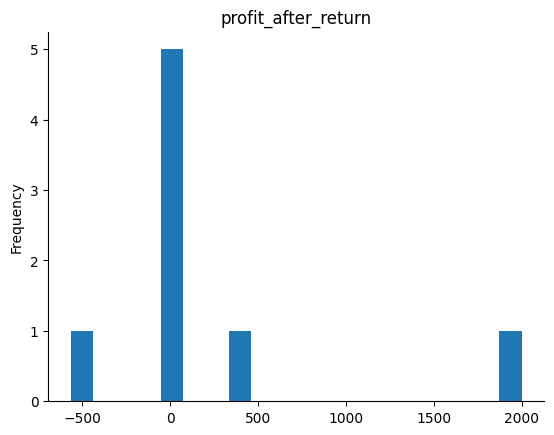

In [29]:
from matplotlib import pyplot as plt
_df_1['profit_after_return'].plot(kind='hist', bins=20, title='profit_after_return')
plt.gca().spines[['top', 'right',]].set_visible(False)

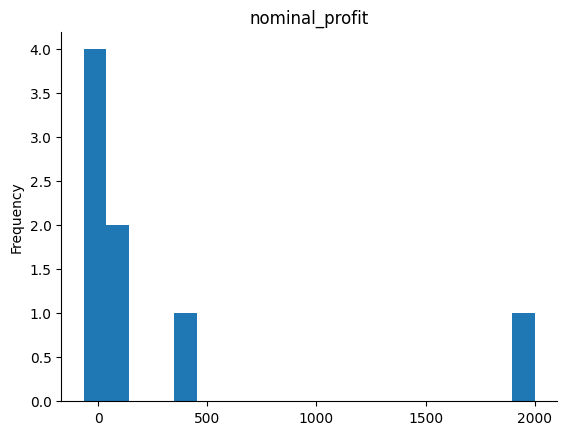

In [30]:
from matplotlib import pyplot as plt
_df_0['nominal_profit'].plot(kind='hist', bins=20, title='nominal_profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

total loss due to returns:

In [28]:
loss_due_to_returns = df['nominal_profit'].sum() - df['profit_after_return'].sum()
print(f"Total Profit Lost due to Returns: ${loss_due_to_returns:,.2f}")


Total Profit Lost due to Returns: $45,556.92


#Total Profit Lost due to Returns: $45,556.92

4. Impact of Returns on Categories / Regions

In [32]:
category_profit = df.groupby('category')[['nominal_profit', 'profit_after_return']].sum()
category_profit['loss_due_to_returns'] = category_profit['nominal_profit'] - category_profit['profit_after_return']
category_profit.sort_values('loss_due_to_returns', ascending=False)


,nominal_profit,profit_after_return,loss_due_to_returns
category,,,
Beauty,12871.33,3270.87,9600.46
Home,9108.33,33.75,9074.58
Apparel,8863.59,1631.87,7231.72
Sports,8832.71,1879.17,6953.54
Electronics,8791.11,1873.57,6917.54
Toys,10082.25,4303.17,5779.08


#Beauty Category Faces High Loss

Here is a summary of the analysis findings:

1.  **Overall Return Rate:** The overall return rate is **17.70%**.
2.  **Most Common Return Reason:** The most common reason for returns is **Size Issue**.
3.  **Profit Before vs After Returns:** The total profit lost due to returns is **$45,556.92**.
4.  **Impact of Returns on Categories / Regions:** The **Beauty** category faces the highest loss due to returns.

**Suggested Action Plans:**

Review return policies for Beauty items

Consider non-returnable items (like cosmetics)

Improve product images / descriptions

A. Return Rate by Category

In [33]:
return_rate_cat = df.groupby('category')['is_returned'].mean().sort_values(ascending=False) * 100
return_rate_cat


,is_returned
category,
Home,21.035599
Sports,19.682540
Beauty,17.687075
Electronics,17.406143
Apparel,16.040956
Toys,14.613181


#Home category has the highest return rate (21%) — possibly due to size, fit, or quality issues.

B. Profit After Return by Region

In [35]:
region_profit = df.groupby('location')[['nominal_profit', 'profit_after_return']].sum()
region_profit['loss_due_to_returns'] = region_profit['nominal_profit'] - region_profit['profit_after_return']
region_profit.sort_values('loss_due_to_returns', ascending=False)


,nominal_profit,profit_after_return,loss_due_to_returns
location,,,
North,13759.79,243.08,13516.71
South,16897.28,6023.23,10874.05
East,14816.07,4017.93,10798.14
West,13076.18,2708.16,10368.02


#North region is almost entirely unprofitable after accounting for returns

C. Discount vs Return Rate

In [36]:
df['discount_bin'] = pd.cut(df['discount'], bins=[0,0.1,0.2,0.3], labels=['Low','Medium','High'])
df.groupby('discount_bin')['is_returned'].mean() * 100


/tmp/ipython-input-623800745.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('discount_bin')['is_returned'].mean() * 100


,is_returned
discount_bin,
Low,17.638266
Medium,16.417910
High,19.267516


#High discounts → higher returns (people buy impulsively, more likely to return)

Here is a summary table of the analysis and suggested action plans:

| Analysis Area                 | Key Finding                                                                  | Suggested Action Plan                                                                                                |
|-------------------------------|------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| **A. Return Rate by Category** | Home category has the highest return rate (21%)                              | Review Home product descriptions, packaging quality, or expectations mismatch.                                     |
| **B. Profit After Return by Region** | North region is almost entirely unprofitable after accounting for returns      | Investigate regional logistics, return behavior, and customer satisfaction in North.                               |
| **C. Discount vs Return Rate** | High discounts lead to higher returns                                        | Avoid excessive discounts (>20%) as they may lead to profit leaks due to returns.                                  |

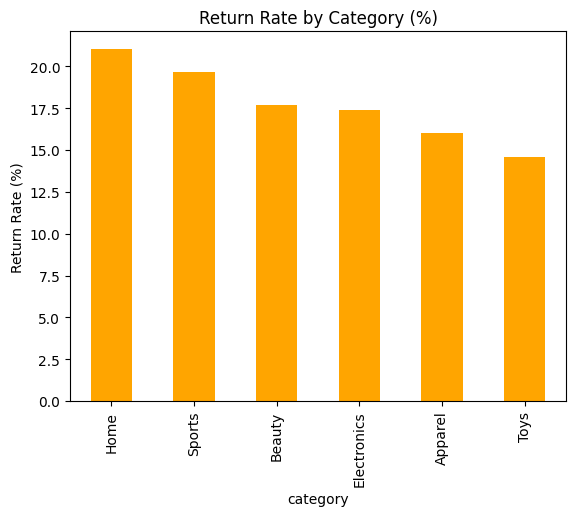

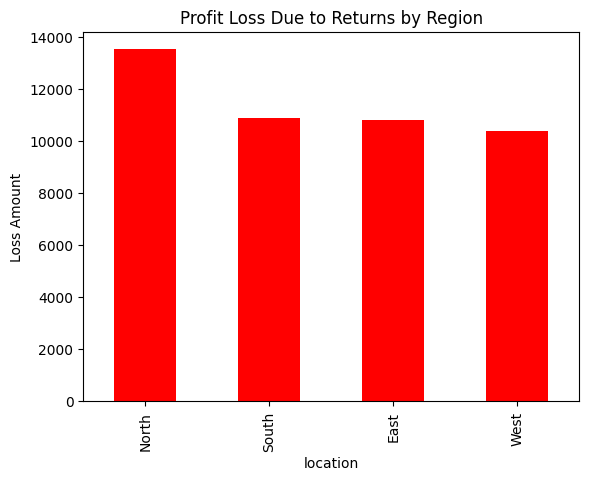

/tmp/ipython-input-1414632144.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('discount_bin')['is_returned'].mean().mul(100).plot(kind='bar', color='purple')


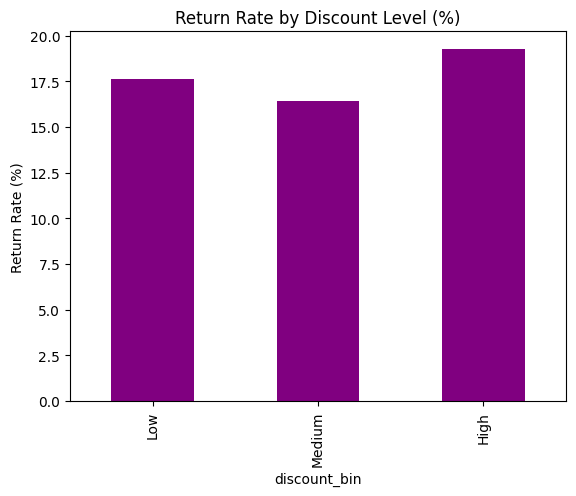

In [37]:
import matplotlib.pyplot as plt

# A. Return rate by category
df.groupby('category')['is_returned'].mean().sort_values(ascending=False).mul(100).plot(kind='bar', color='orange')
plt.title("Return Rate by Category (%)")
plt.ylabel("Return Rate (%)")
plt.show()

# B. Loss by Region
region_profit['loss_due_to_returns'].sort_values(ascending=False).plot(kind='bar', color='red')
plt.title("Profit Loss Due to Returns by Region")
plt.ylabel("Loss Amount")
plt.show()

# C. Discount Bin vs Return Rate
df.groupby('discount_bin')['is_returned'].mean().mul(100).plot(kind='bar', color='purple')
plt.title("Return Rate by Discount Level (%)")
plt.ylabel("Return Rate (%)")
plt.show()


In [39]:
import pandas as pd

# Overall KPIs
overall_return_rate = df['is_returned'].mean() * 100
total_nominal_profit = df['nominal_profit'].sum()
total_final_profit = df['profit_after_return'].sum()
total_loss = total_nominal_profit - total_final_profit
loss_pct = (total_loss / total_nominal_profit) * 100

# Category-wise summary
category_summary = df.groupby('category').agg(
    return_rate=('is_returned', lambda x: round(x.mean() * 100, 2)),
    nominal_profit=('nominal_profit', 'sum'),
    final_profit=('profit_after_return', 'sum')
)
category_summary['loss_due_to_returns'] = category_summary['nominal_profit'] - category_summary['final_profit']
category_summary['loss_pct'] = (category_summary['loss_due_to_returns'] / category_summary['nominal_profit']) * 100

# Region-wise summary
region_summary = df.groupby('location').agg(
    return_rate=('is_returned', lambda x: round(x.mean() * 100, 2)),
    nominal_profit=('nominal_profit', 'sum'),
    final_profit=('profit_after_return', 'sum')
)
region_summary['loss_due_to_returns'] = region_summary['nominal_profit'] - region_summary['final_profit']
region_summary['loss_pct'] = (region_summary['loss_due_to_returns'] / region_summary['nominal_profit']) * 100

# Print dashboard
print("📊 --- E-commerce Returns & Profitability Dashboard ---")
print(f"Overall Return Rate: {overall_return_rate:.2f}%")
print(f"Total Nominal Profit: ${total_nominal_profit:,.2f}")
print(f"Total Final Profit After Returns: ${total_final_profit:,.2f}")
print(f"Total Profit Lost to Returns: ${total_loss:,.2f} ({loss_pct:.2f}%)\n")

print("📂 Category-wise Summary:")
display(category_summary.sort_values('loss_due_to_returns', ascending=False))

print("🌍 Region-wise Summary:")
display(region_summary.sort_values('loss_due_to_returns', ascending=False))


📊 --- E-commerce Returns & Profitability Dashboard ---
Overall Return Rate: 17.70%
Total Nominal Profit: $58,549.32
Total Final Profit After Returns: $12,992.40
Total Profit Lost to Returns: $45,556.92 (77.81%)

📂 Category-wise Summary:


,return_rate,nominal_profit,final_profit,loss_due_to_returns,loss_pct
category,,,,,
Beauty,17.69,12871.33,3270.87,9600.46,74.587941
Home,21.04,9108.33,33.75,9074.58,99.629460
Apparel,16.04,8863.59,1631.87,7231.72,81.589063
Sports,19.68,8832.71,1879.17,6953.54,78.724876
Electronics,17.41,8791.11,1873.57,6917.54,78.687902
Toys,14.61,10082.25,4303.17,5779.08,57.319348


🌍 Region-wise Summary:


,return_rate,nominal_profit,final_profit,loss_due_to_returns,loss_pct
location,,,,,
North,20.17,13759.79,243.08,13516.71,98.233403
South,14.31,16897.28,6023.23,10874.05,64.353849
East,17.00,14816.07,4017.93,10798.14,72.881270
West,20.04,13076.18,2708.16,10368.02,79.289364
